<a href="https://colab.research.google.com/github/Vanluan39/Report-AI-Mid_Term1/blob/main/B%C3%80I5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

#load folder datasets
folder = '/content/drive/MyDrive/FACE/'

#tiến hành tiền xử lý dữ liệu
photos, labels = list(), list()

for file in listdir(folder):
    output = 0.0
    if file.startswith('l '):
        output = 1.0
    if file.startswith('Cuong'):
        output = 2.0
    if file.startswith('Danh() '):
        output = 3.0
    if file.startswith('Dien() '):
        output = 4.0
    if file.startswith('Đat() '):
        output = 5.0
    if file.startswith('Huy() '):
        output = 6.0
    if file.startswith('huy_ '):
        output = 7.0
    if file.startswith('Khiet() '):
        output = 8.0
    if file.startswith('Khang () '):
        output = 9.0
    img = load_img(folder+file, target_size=(200,200))
    photo = img_to_array(img)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)

print(photos.shape, labels.shape)

# lưu dữ liệu vừa xử lý
save('face_photos_train.npy',photos)
save('face_labels_train.npy',labels)



(715, 200, 200, 3) (715,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x_train = np.load('/content/face_photos_train.npy')
y_train = np.load('/content/face_labels_train.npy')
print(x_train.shape)
print(y_train.shape)

(715, 200, 200, 3)
(715,)


In [ ]:
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)

In [ ]:
# kết nối với driver để load dữ liệu
from google.colab import drive
drive.mount('/content/drive')

# tạo dữ liệu train
import numpy as np
x_train = np.load('/content/face_photos_train.npy')
y_train = np.load('/content/face_labels_train.npy')
x_train = x_train.astype('float32')/255

from keras.utils import to_categorical
y_train = to_categorical(y_train,10)

# tiến hành tích chập
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

#32 lan tich chap
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(200,200,3), padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

#128 lan tich chap
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# train mô hình
from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
model.summary()
train = model.fit(x_train, y_train, batch_size=8, epochs=70, verbose=1)

#lưu mô hình vừa train
model.save('face_train.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 100, 100, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                    

1/1 [==============================] - 0s 272ms/step
Khang()


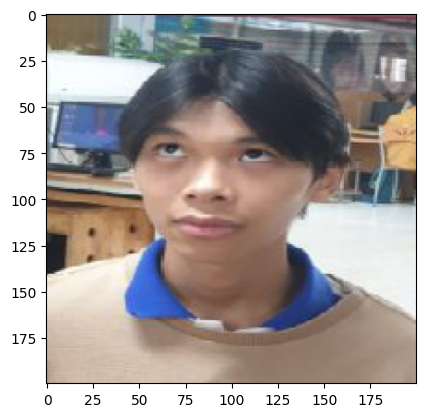

In [ ]:
#load mô hình 
from keras.models import load_model
model5 = load_model('/content/face_train.h5/')

#load ảnh và cho AI tiến hành nhận diện
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

vat = {1: 'Khang()', 2: 'l', 3: 'Cuong', 4: 'Khiet()'}
img = load_img("/content/drive/MyDrive/FACE/Khang (28).jpg", target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
output = model5.predict(img)
result = np.argmax(output, axis=1)[0] +1
print(vat[result])